In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
from sklearn import datasets, svm
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from mlwrap import get_test, get_train, push_test

In [2]:
x_train = pd.read_csv("x_train.csv", delimiter=";", dtype=np.float32)
y_train = pd.read_csv("y_train.csv", delimiter=";", header=None,
                      names=["returned"], dtype=np.float32)
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.read_csv("x_test.csv", delimiter=";")

In [3]:
all_params = ["maxPlayerLevel",
              "numberOfAttemptedLevels",
              "attemptsOnTheHighestLevel",
              "totalNumOfAttempts",
              "averageNumOfTurnsPerCompletedLevel",
              "doReturnOnLowerLevels",
              "numberOfBoostersUsed",
              "fractionOfUsefullBoosters",
              "totalScore",
              "totalBonusScore",
              "totalStarsCount",
              "numberOfDaysActuallyPlayed",
]

In [4]:
x_train

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39.0,10.0,3.0,17.0,24.444445,1.0,5.0,0.400000,2650000.0,1375.0,21.0,2.0
1,21.0,22.0,19.0,55.0,17.045454,1.0,6.0,0.333333,5614000.0,3825.0,51.0,4.0
2,5.0,6.0,1.0,6.0,8.400000,0.0,1.0,1.000000,857000.0,1150.0,14.0,1.0
3,21.0,2.0,5.0,6.0,19.000000,0.0,1.0,0.000000,120000.0,0.0,1.0,1.0
4,4.0,5.0,1.0,5.0,9.600000,0.0,1.0,1.000000,857000.0,1075.0,12.0,1.0
5,0.0,1.0,1.0,1.0,3.000000,0.0,0.0,0.000000,113000.0,250.0,0.0,1.0
6,13.0,14.0,2.0,19.0,15.500000,0.0,5.0,0.800000,3831000.0,2875.0,34.0,2.0
7,13.0,14.0,5.0,26.0,14.769231,0.0,4.0,0.500000,3458000.0,2375.0,31.0,2.0
8,2.0,3.0,1.0,3.0,7.666667,0.0,0.0,0.000000,420000.0,750.0,6.0,1.0
9,1.0,2.0,3.0,5.0,3.000000,1.0,0.0,0.000000,113000.0,250.0,3.0,1.0


In [5]:
x_train.shape

(25289, 12)

In [9]:
print(train_data.head)

<bound method NDFrame.head of        maxPlayerLevel  numberOfAttemptedLevels  attemptsOnTheHighestLevel  \
0                39.0                     10.0                        3.0   
1                21.0                     22.0                       19.0   
2                 5.0                      6.0                        1.0   
3                21.0                      2.0                        5.0   
4                 4.0                      5.0                        1.0   
5                 0.0                      1.0                        1.0   
6                13.0                     14.0                        2.0   
7                13.0                     14.0                        5.0   
8                 2.0                      3.0                        1.0   
9                 1.0                      2.0                        3.0   
10                9.0                     10.0                        1.0   
11               93.0                     16.0

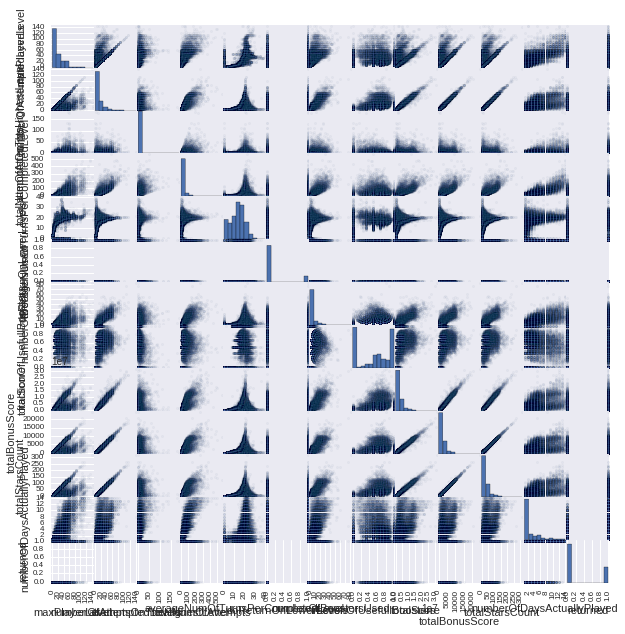

In [10]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(train_data, alpha=0.05, figsize=(10, 10));

In [68]:
train_data_normalized = (train_data - train_data.mean()) / train_data.std()
test_data_normalized = (test_data - train_data.mean()) / train_data.std()
test_data_normalized = test_data_normalized.drop(("returned"), axis=1)
test_data_normalized.describe()

,attemptsOnTheHighestLevel,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,fractionOfUsefullBoosters,maxPlayerLevel,numberOfAttemptedLevels,numberOfBoostersUsed,numberOfDaysActuallyPlayed,totalBonusScore,totalNumOfAttempts,totalScore,totalStarsCount
count,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000
mean,-0.019401,0.003131,-0.005390,0.012283,-0.006135,-0.000326,-0.006173,-0.010510,0.000771,-0.006355,-0.000745,0.000651
std,0.963158,0.996850,0.994759,0.997417,0.984284,0.993320,0.987008,0.989383,0.995334,0.984792,0.988540,0.994967
min,-0.370584,-2.002408,-0.424084,-1.330146,-0.913346,-0.878701,-0.739197,-0.623812,-0.985351,-0.646147,-0.844512,-0.914328
25%,-0.370584,-0.725600,-0.424084,-1.330146,-0.715060,-0.724759,-0.739197,-0.623812,-0.685811,-0.571134,-0.691088,-0.710271
50%,-0.370584,0.181454,-0.424084,0.224229,-0.368061,-0.339904,-0.437559,-0.623812,-0.294103,-0.371100,-0.336808,-0.302157
75%,-0.075017,0.656358,-0.424084,1.156855,0.425079,0.275865,0.165717,0.099424,0.328020,0.103983,0.296798,0.344023
max,53.422673,5.207805,2.357930,1.156855,6.224921,10.205133,12.231228,4.077221,11.053891,11.330939,9.335045,10.784934


In [99]:
X = train_data_normalized.drop(('returned'), axis=1)
y = train_data_normalized['returned']
feature_names = X.columns
print(feature_names)

Index(['maxPlayerLevel', 'numberOfAttemptedLevels',
       'attemptsOnTheHighestLevel', 'totalNumOfAttempts',
       'averageNumOfTurnsPerCompletedLevel', 'doReturnOnLowerLevels',
       'numberOfBoostersUsed', 'fractionOfUsefullBoosters', 'totalScore',
       'totalBonusScore', 'totalStarsCount', 'numberOfDaysActuallyPlayed'],
      dtype='object')


In [100]:
print(X.shape)
print(y.shape)
N, d = X.shape

(25289, 12)
(25289,)


In [101]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

17702 7587


In [102]:
y_train_1D = [int(x>1.) for x in list(y_train)]
y_test_1D = [int(x>1.) for x in list(y_test)]

In [103]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=15, random_state=35, max_features=5)

In [104]:
rf.fit(X_train, y_train_1D)
err_train = np.mean(y_train_1D != rf.predict(X_train))
err_test  = np.mean(y_test_1D  != rf.predict(X_test))
print(err_train, err_test)

0.0106202688962 0.194938710953


In [105]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'totalNumOfAttempts' (0.2286)
 2. feature 'numberOfDaysActuallyPlayed' (0.1772)
 3. feature 'maxPlayerLevel' (0.1154)
 4. feature 'totalScore' (0.1055)
 5. feature 'averageNumOfTurnsPerCompletedLevel' (0.0973)
 6. feature 'totalBonusScore' (0.0638)
 7. feature 'totalStarsCount' (0.0496)
 8. feature 'numberOfBoostersUsed' (0.0449)
 9. feature 'fractionOfUsefullBoosters' (0.0421)
10. feature 'attemptsOnTheHighestLevel' (0.0406)
11. feature 'numberOfAttemptedLevels' (0.0281)
12. feature 'doReturnOnLowerLevels' (0.0071)


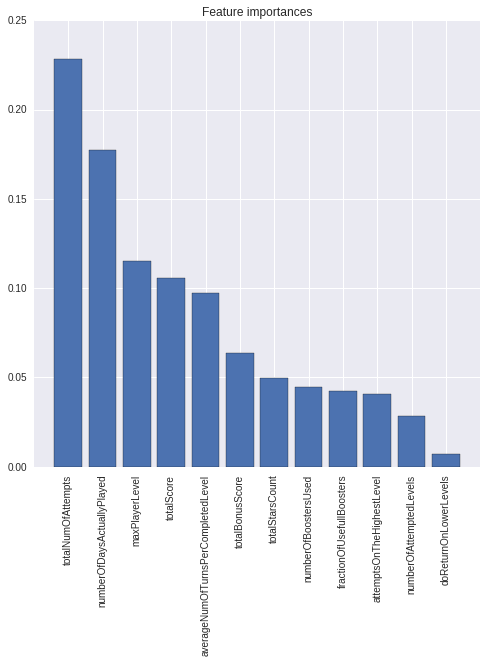

In [106]:
d_first = 12
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [107]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train_1D)

err_train = np.mean(y_train_1D != gbt.predict(X_train))
err_test = np.mean(y_test_1D != gbt.predict(X_test))
print(err_train, err_test)

0.161676646707 0.17793594306


In [108]:
out = [int(x) for x in gbt.predict(test_data_normalized)]
#print(out)
#np.savetxt("YOLO_GBT_RULES.csv", out)



In [ ]:
with open("YOLO_GBT_RULES.csv", 'w', newline='\n') as file:
    for item in out:
        file.write(str(int(item)) + "\n")

In [76]:
import numpy
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [77]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train_1D)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [80]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test_1D, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.35%


In [82]:
from sklearn.metrics import log_loss
log_loss(y_test_1D, predictions, eps=1e-15)

6.0956726726965709

In [83]:
X_train

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
15266,1.565219,0.121923,1.846171,1.354201,1.313828,-0.424084,-0.286740,-0.501146,-0.140636,-0.109770,-0.098100,2.269131
12784,0.028509,0.583749,-0.222800,1.129162,0.372578,2.357930,-0.286740,1.156855,1.754032,1.042310,0.990203,0.461042
9652,-0.021062,0.506778,-0.370584,0.053975,0.519585,-0.424084,0.316535,0.446283,0.326956,0.408666,0.412042,0.461042
10289,-0.368061,-0.032019,-0.370584,-0.371100,0.288337,-0.424084,-0.588378,1.156855,-0.020298,-0.098249,-0.098100,-0.623812
5596,-0.913346,-0.878701,-0.370584,-0.646147,-1.551770,-0.424084,-0.739197,-1.330146,-0.811426,-0.870143,-0.914328,-0.623812
10451,-0.368061,-0.032019,-0.370584,-0.371100,0.213230,-0.424084,-0.437559,1.156855,0.142203,0.155208,0.071947,-0.262194
13995,-0.467204,-0.185961,-0.370584,-0.421108,0.055507,-0.424084,-0.437559,1.156855,-0.201830,-0.040645,-0.064091,-0.262194
218,0.276366,0.968605,-0.370584,0.103983,0.593269,-0.424084,0.919811,0.930764,1.055426,0.996227,0.854165,0.099424
18540,0.127652,0.737691,0.072767,0.254009,0.544056,-0.424084,0.014898,0.659454,0.389614,0.673645,0.752137,0.461042
16024,1.664362,-0.416875,-0.075017,1.529232,1.577663,-0.424084,0.316535,-0.619575,-0.601200,-0.708852,-0.642252,2.630749


In [111]:
y_pred = model.predict(train_data_normalized.drop(("returned"), axis=1))
predictions = [round(value) for value in y_pred]

In [112]:
predictions

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [113]:
with open("YOLO_XKGB_RULES.csv", 'w', newline='\n') as file:
    for item in predictions:
        file.write(str(int(item)) + "\n")